In [28]:
import numpy as np
import math
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# New Section

In [29]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['AAL' 'AAPL' 'AAP' 'ABBV' 'ABC' 'ABT' 'ACN' 'ADBE' 'ADI' 'ADM' 'ADP'
 'ADSK' 'ADS' 'AEE' 'AEP' 'AES' 'AET' 'AFL' 'AGN' 'AIG' 'AIV' 'AIZ' 'AJG'
 'AKAM' 'ALB']


,avg_adjprofit,avg_percent,variance,trend,cluster,Name,est_current_cost
0,-0.555485,-0.014665,0.001347,0.000000,0,AAL,46.984912
1,-4.393476,-0.040287,0.005024,0.000000,0,AAPL,145.253346
2,1.391904,0.050982,0.007123,0.312995,0,AAP,72.649760
3,4.297630,0.061139,0.005144,1.000000,0,ABBV,83.531057
4,-1.894712,-0.044324,0.005773,0.000000,0,ABC,72.419608
5,0.767160,0.026477,0.000754,1.000000,0,ABT,41.604140
6,0.174579,-0.002353,0.000340,0.000000,0,ACN,123.278072
7,10.056156,0.065285,0.003895,1.000000,0,ADBE,166.540660
8,-1.795825,-0.043117,0.005261,0.000000,0,ADI,68.912196
9,0.456861,0.042943,0.003073,1.000000,0,ADM,24.693039


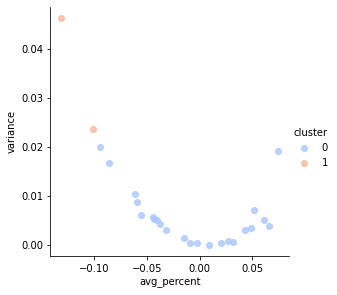

In [30]:
import statistics
import pandas as pd
import numpy as np
import csv
import random
import copy

stockData = pd.read_csv('/content/drive/Shareddrives/Machine learning_spring 2021/all_stocks_5yr.csv' )

# number of stock to process
numberStock = 25
stockTrimmed = {}

# get all types of stock
stockType = (stockData['Name'].unique()[:numberStock])
originalPrice = []

print(stockType)
# average out volume trades

#for stock in range(len(stockType) - 2, len(stockType)):
#  numStock = 0
#  volume = 0
#  data = stockData.loc[(stockData['Name'] == 'ZTS')]
#  print(data)
  # calculate volume

def parseML(data):
  columns = len(data)
  newData = []
  for column in range(columns):
    # find profit
    profit = float(data[column][1]) - float(data[column][0])
    # determine if increasing or decreasing
    trend = 1
    if (profit < 0):
      trend = 0
    # find percent profit
    percentProfit = profit / float(data[column][0])
    #profit = abs(profit)
    newData.append([profit, percentProfit, trend, data[column][2]])
  return newData

def calculateRisk(dataLSTM, dataARIMA, numStock):
  # risk is defined as high or low
  # to have low risk:
  #    the models must correlate
  #    and a prediction of an increase or decrease
  # to have high risk:
  #    the models don't correlate
  #    and a prediction of an increase or decrease
  model1 = parseML(dataLSTM)
  model2 = parseML(dataARIMA)
  results = []
  # get names of stock
  #stockType = stockData.loc[:,'Name'].values
  #print(model1)
  # results = [expectedProfit, percentageIncrease, Trend]
  for column in range(numStock):
    correlate = 0.5
    # checking positive correlation
    if (model1[column][2] == 1 and model2[column][2] == 1):
      correlate = 1
    # checking negative correlation
    if (model1[column][2] == 0 and model1[column][2] == 0):
      correlate = 0
    
    # calculate average percent increase
    # NOT BUY < 2%
    # BUY > 2%
    # STRONG BUY > 5%
    avgProfit =((model1[column][0] + model2[column][0])) / 2
    avgPercent = ((model1[column][1] + model2[column][1])) / 2

    # if the models don't correlate, we will radomize a number predict a negative trend
    #trend = -1
    #if (correlate == 1): trend = 1
    # if the models don't match, we will estimate 0.5 and randomize a bias
    if correlate == 0.5:
      correlate += random.uniform(-0.5, 0.5)

    buy = 'NOT BUY'
    if (avgPercent > 0.06):
      buy = 'STRONG BUY'
    elif (avgPercent > 0.03):
      buy = 'BUY'

    # if trend is decreasing, change the buy to a warning, up to user
    #if (trend == 'DECREASE'):
    #  buy = 'RISKY BUY'

    # variance
    vData = [model1[column][1], model2[column][1]]
    #print(vData)
    variance = statistics.variance(vData)
    # compile
    #print(model1[column][1])
    #results.append([model1[column][3], avgProfit, avgPercent, buy, trend])
    results.append([avgProfit, avgPercent, variance, correlate])
    originalPrice.append((float(dataLSTM[column][0]) + float(dataARIMA[column][0])) / 2)
    #originalPrice.append(float(dataARIMA[column][0]))

  return results

def parseData():
  model1 = []
  with open("/content/drive/Shareddrives/Machine learning_spring 2021/ARIMA_final.csv") as csvfile:
      reader = csv.reader(csvfile) # change contents to floats
      for row in reader: # each row is a list
          model1.append(row)

  model2 = []
  with open("/content/drive/Shareddrives/Machine learning_spring 2021/LSTM_final.csv") as csvfile:
      reader = csv.reader(csvfile) # change contents to floats
      for row in reader: # each row is a list
          model2.append(row)

  # slice off headers
  model1.pop(0)
  model2.pop(0)

  results = calculateRisk(model2, model1, numberStock)
  return results

results = parseData()

#variances = []
#for v in range(len(results)):
#  # get variance array
#  variances.append(results[v][2])

# recommendation system
# implement k-means to separate into two clusters
# CLuster 1 (BUY), Cluster 2 (NOT BUY)
from sklearn.cluster import KMeans
kmodel = KMeans(n_clusters = 2, max_iter=500)
kmodel.fit(results)
#print(kmodel.cluster_centers_)
#print(kmodel.labels_)

import seaborn as sns
unique, counts = np.unique(kmodel.labels_, return_counts=True)
dict_data = dict(zip(unique, counts))
#print(dict_data)

# create pandas data frame
df = pd.DataFrame(results, columns = ['avg_adjprofit','avg_percent', 'variance', 'trend'])
df["cluster"] = kmodel.labels_
#data["cluster"] = kmodel.labels_
sns.lmplot(y='variance', x='avg_percent', data=df, hue='cluster', palette='coolwarm', height=4, aspect=1, fit_reg=False)

# add back stock names
df['Name'] = stockType
# add back original stock prices before prediction

model = []
with open("/content/drive/Shareddrives/Machine learning_spring 2021/LSTM_final.csv") as csvfile:
    reader = csv.reader(csvfile) # change contents to floats
    for row in reader: # each row is a list
        model.append(row)

df['est_current_cost'] = originalPrice

#print(originalPrice)
df


In [37]:
# User Parameters

# How Much Initial Investment Capital
# Integer to the nearest Dollar
maxprice = 100

# What is your Acceptable Risk
# HIGH, MEDIUM, LOW
# Defaults to LOW
risk = 'HIGH'

# How many stocks to Recommend
# Integer 1-5, default 5
num = 3


# validate data
maxprice = int(maxprice)
risk = risk.upper()
num = int(num)

if risk != 'HIGH' or risk != 'MEDIUM' or risk!= 'LOW':
  risk = 'LOW'

if num > 5 or num < 1:
  num = 5

# convert to floats
df['avg_adjprofit'] = df['avg_adjprofit'].astype(float)
df['avg_percent'] = df['avg_percent'].astype(float)
df['variance'] = df['variance'].astype(float)
df['trend'] = df['trend'].astype(float)
df['cluster'] = df['cluster'].astype(float)
df['est_current_cost'] = df['est_current_cost'].astype(float)
showColumns = ['avg_adjprofit', 'avg_percent', 'variance', 'trend', 'cluster', 'Name']
print("Single level of risk not implemented for testing stages.  All classes of risk shown\n")
#print("Shown for a max stock price of:")

Single level of risk not implemented for testing stages.  All classes of risk shown



In [32]:
# LOW RISK
print("LOW RISK\n")
lowrisk = (df.loc[(df['est_current_cost'] <= maxprice) & (df['trend'] == 1) & (df['cluster'] == 0)]).sort_values(by=['avg_adjprofit']).head(num)
dfx = lowrisk[showColumns]
dfx

LOW RISK



,avg_adjprofit,avg_percent,variance,trend,cluster,Name
9,0.456861,0.042943,0.003073,1.0,0.0,ADM
5,0.767160,0.026477,0.000754,1.0,0.0,ABT
11,0.862313,0.008762,0.000007,1.0,0.0,ADSK


In [33]:
# MEDIUM RISK
print("\n\nMEDIUM RISK (Negative Predicted Trend)\n")
mediumrisk = df.loc[(df['est_current_cost'] <= maxprice) & ((df['trend'] == 0) | (df['trend'] == 1)) & (df['variance'] <= 0.02) & (df['cluster'] == 0)].sort_values(by=['avg_adjprofit']).head(num)
dfx = mediumrisk[showColumns]
dfx



MEDIUM RISK (Negative Predicted Trend)



,avg_adjprofit,avg_percent,variance,trend,cluster,Name
21,-3.882141,-0.061500,0.010478,0.0,0.0,AIZ
14,-2.405507,-0.085826,0.016822,0.0,0.0,AEP
10,-2.083747,-0.037622,0.004214,0.0,0.0,ADP


In [34]:
print("\nMEDIUM RISK (Positive Predicted Trend)\n")
mediumrisk = df.loc[(df['est_current_cost'] <= maxprice) & ((df['trend'] == 0) | (df['trend'] == 1)) & (df['variance'] <= 0.02) & (df['cluster'] == 0)].sort_values(by=['avg_adjprofit'], ascending=False).head(num)
dfx = mediumrisk[showColumns]
dfx


MEDIUM RISK (Positive Predicted Trend)



,avg_adjprofit,avg_percent,variance,trend,cluster,Name
3,4.297630,0.061139,0.005144,1.0,0.0,ABBV
22,1.475482,0.048463,0.003488,1.0,0.0,AJG
17,0.970366,0.019736,0.000326,1.0,0.0,AFL


In [35]:
# HIGH RISK
print("\n\nHIGH RISK (Negative Predicted Trend)\n")
highrisk = df.loc[(df['est_current_cost'] <= maxprice)].sort_values(by=['avg_adjprofit']).head(num)
dfx = highrisk[showColumns]
dfx



HIGH RISK (Negative Predicted Trend)



,avg_adjprofit,avg_percent,variance,trend,cluster,Name
21,-3.882141,-0.061500,0.010478,0.0,0.0,AIZ
14,-2.405507,-0.085826,0.016822,0.0,0.0,AEP
10,-2.083747,-0.037622,0.004214,0.0,0.0,ADP


In [36]:
print("\n\nHIGH RISK (Positive Predicted Trend)\n")
highrisk = df.loc[(df['est_current_cost'] <= maxprice)].sort_values(by=['avg_adjprofit'], ascending=False).head(num)
dfx = highrisk[showColumns]
dfx



HIGH RISK (Positive Predicted Trend)



,avg_adjprofit,avg_percent,variance,trend,cluster,Name
3,4.297630,0.061139,0.005144,1.000000,0.0,ABBV
22,1.475482,0.048463,0.003488,1.000000,0.0,AJG
2,1.391904,0.050982,0.007123,0.312995,0.0,AAP
